# 模型所用数据的基本分析
分类新闻数据，共9类每类各1990条，共17910条。

这9类分别为：财经，科技，健康，体育，旅游，教育，就业，文艺，国际新闻

做以下两种分析：
* 新闻长度统计
* 整个语料词频统计

In [ ]:
import os
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir('G:/我的项目/w2v_model')  #配置工作路径
os.getcwd()

# 新闻长度统计

In [ ]:
def get_subfile(file_dir):  # 复制自 data_cut.py
    all_file = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if '._' not in file:
                if os.path.splitext(file)[1] == '.txt':
                    all_file.append(os.path.join(root,file))
    return all_file
def get_text_len(files):
    text_lens = []
    for file in files:
        with open(file, encoding = 'gb18030') as f:
            print(file,'...begining')
            document = f.read()
            document = document.strip()
            text_lens.append(len(document))
    return text_lens

In [13]:
data_dir = './Reduced'
all_text_len = get_text_len(get_subfile(data_dir))

./Reduced\C000008\1053.txt ...begining
./Reduced\C000008\1735.txt ...begining
./Reduced\C000008\1721.txt ...begining
./Reduced\C000008\1047.txt ...begining
./Reduced\C000008\1709.txt ...begining
./Reduced\C000008\289.txt ...begining
./Reduced\C000008\504.txt ...begining
./Reduced\C000008\1090.txt ...begining
./Reduced\C000008\262.txt ...begining
./Reduced\C000008\276.txt ...begining
./Reduced\C000008\1084.txt ...begining
./Reduced\C000008\510.txt ...begining
./Reduced\C000008\538.txt ...begining
./Reduced\C000008\1912.txt ...begining
./Reduced\C000008\1906.txt ...begining
./Reduced\C000008\1537.txt ...begining
./Reduced\C000008\1251.txt ...begining
./Reduced\C000008\909.txt ...begining
./Reduced\C000008\1245.txt ...begining
./Reduced\C000008\1523.txt ...begining
./Reduced\C000008\921.txt ...begining
./Reduced\C000008\935.txt ...begining
./Reduced\C000008\1279.txt ...begining
./Reduced\C000008\1292.txt ...begining
./Reduced\C000008\706.txt ...begining
./Reduced\C000008\712.txt ...begini

./Reduced\C000008\1557.txt ...begining
./Reduced\C000008\1231.txt ...begining
./Reduced\C000008\955.txt ...begining
./Reduced\C000008\1219.txt ...begining
./Reduced\C000008\941.txt ...begining
./Reduced\C000008\799.txt ...begining
./Reduced\C000008\772.txt ...begining
./Reduced\C000008\1580.txt ...begining
./Reduced\C000008\1594.txt ...begining
./Reduced\C000008\766.txt ...begining
./Reduced\C000008\996.txt ...begining
./Reduced\C000008\982.txt ...begining
./Reduced\C000008\1351.txt ...begining
./Reduced\C000008\1437.txt ...begining
./Reduced\C000008\1423.txt ...begining
./Reduced\C000008\49.txt ...begining
./Reduced\C000008\1345.txt ...begining
./Reduced\C000008\809.txt ...begining
./Reduced\C000008\61.txt ...begining
./Reduced\C000008\821.txt ...begining
./Reduced\C000008\75.txt ...begining
./Reduced\C000008\1379.txt ...begining
./Reduced\C000008\835.txt ...begining
./Reduced\C000008\606.txt ...begining
./Reduced\C000008\1392.txt ...begining
./Reduced\C000008\160.txt ...begining
./Re

./Reduced\C000008\1011.txt ...begining
./Reduced\C000008\585.txt ...begining
./Reduced\C000008\591.txt ...begining
./Reduced\C000008\1005.txt ...begining
./Reduced\C000008\1763.txt ...begining
./Reduced\C000008\1993.txt ...begining
./Reduced\C000008\1039.txt ...begining
./Reduced\C000008\1987.txt ...begining
./Reduced\C000008\220.txt ...begining
./Reduced\C000008\546.txt ...begining
./Reduced\C000008\552.txt ...begining
./Reduced\C000008\234.txt ...begining
./Reduced\C000008\1978.txt ...begining
./Reduced\C000008\1788.txt ...begining
./Reduced\C000008\1950.txt ...begining
./Reduced\C000008\208.txt ...begining
./Reduced\C000008\1944.txt ...begining
./Reduced\C000008\787.txt ...begining
./Reduced\C000008\1213.txt ...begining
./Reduced\C000008\1575.txt ...begining
./Reduced\C000008\1561.txt ...begining
./Reduced\C000008\1207.txt ...begining
./Reduced\C000008\793.txt ...begining
./Reduced\C000008\963.txt ...begining
./Reduced\C000008\1549.txt ...begining
./Reduced\C000008\977.txt ...begini

./Reduced\C000008\1968.txt ...begining
./Reduced\C000008\224.txt ...begining
./Reduced\C000008\1940.txt ...begining
./Reduced\C000008\1798.txt ...begining
./Reduced\C000008\1954.txt ...begining
./Reduced\C000008\218.txt ...begining
./Reduced\C000008\1767.txt ...begining
./Reduced\C000008\1001.txt ...begining
./Reduced\C000008\595.txt ...begining
./Reduced\C000008\581.txt ...begining
./Reduced\C000008\1015.txt ...begining
./Reduced\C000008\1773.txt ...begining
./Reduced\C000008\1983.txt ...begining
./Reduced\C000008\1029.txt ...begining
./Reduced\C000008\1997.txt ...begining
./Reduced\C000008\1072.txt ...begining
./Reduced\C000008\1714.txt ...begining
./Reduced\C000008\280.txt ...begining
./Reduced\C000008\294.txt ...begining
./Reduced\C000008\1700.txt ...begining
./Reduced\C000008\1066.txt ...begining
./Reduced\C000008\1728.txt ...begining
./Reduced\C000008\525.txt ...begining
./Reduced\C000008\243.txt ...begining
./Reduced\C000008\257.txt ...begining
./Reduced\C000008\531.txt ...begin

./Reduced\C000008\327.txt ...begining
./Reduced\C000008\333.txt ...begining
./Reduced\C000008\455.txt ...begining
./Reduced\C000008\1857.txt ...begining
./Reduced\C000008\1843.txt ...begining
./Reduced\C000008\469.txt ...begining
./Reduced\C000008\1116.txt ...begining
./Reduced\C000008\482.txt ...begining
./Reduced\C000008\1670.txt ...begining
./Reduced\C000008\1664.txt ...begining
./Reduced\C000008\496.txt ...begining
./Reduced\C000008\1102.txt ...begining
./Reduced\C000008\1894.txt ...begining
./Reduced\C000008\1880.txt ...begining
./Reduced\C000008\1658.txt ...begining
./Reduced\C000008\125.txt ...begining
./Reduced\C000008\643.txt ...begining
./Reduced\C000008\657.txt ...begining
./Reduced\C000008\131.txt ...begining
./Reduced\C000008\119.txt ...begining
./Reduced\C000008\1499.txt ...begining
./Reduced\C000008\1472.txt ...begining
./Reduced\C000008\858.txt ...begining
./Reduced\C000008\18.txt ...begining
./Reduced\C000008\680.txt ...begining
./Reduced\C000008\1314.txt ...begining
.

./Reduced\C000014\1082.txt ...begining
./Reduced\C000014\516.txt ...begining
./Reduced\C000014\502.txt ...begining
./Reduced\C000014\1096.txt ...begining
./Reduced\C000014\264.txt ...begining
./Reduced\C000014\1928.txt ...begining
./Reduced\C000014\933.txt ...begining
./Reduced\C000014\1519.txt ...begining
./Reduced\C000014\927.txt ...begining
./Reduced\C000014\1243.txt ...begining
./Reduced\C000014\1525.txt ...begining
./Reduced\C000014\1531.txt ...begining
./Reduced\C000014\1257.txt ...begining
./Reduced\C000014\728.txt ...begining
./Reduced\C000014\714.txt ...begining
./Reduced\C000014\1280.txt ...begining
./Reduced\C000014\1294.txt ...begining
./Reduced\C000014\700.txt ...begining
./Reduced\C000014\847.txt ...begining
./Reduced\C000014\1479.txt ...begining
./Reduced\C000014\13.txt ...begining
./Reduced\C000014\853.txt ...begining
./Reduced\C000014\1337.txt ...begining
./Reduced\C000014\1451.txt ...begining
./Reduced\C000014\1445.txt ...begining
./Reduced\C000014\1323.txt ...beginin

./Reduced\C000014\1977.txt ...begining
./Reduced\C000014\575.txt ...begining
./Reduced\C000014\1787.txt ...begining
./Reduced\C000014\213.txt ...begining
./Reduced\C000014\207.txt ...begining
./Reduced\C000014\1793.txt ...begining
./Reduced\C000014\561.txt ...begining
./Reduced\C000014\950.txt ...begining
./Reduced\C000014\788.txt ...begining
./Reduced\C000014\944.txt ...begining
./Reduced\C000014\1208.txt ...begining
./Reduced\C000014\1546.txt ...begining
./Reduced\C000014\1220.txt ...begining
./Reduced\C000014\978.txt ...begining
./Reduced\C000014\1234.txt ...begining
./Reduced\C000014\1552.txt ...begining
./Reduced\C000014\993.txt ...begining
./Reduced\C000014\987.txt ...begining
./Reduced\C000014\1585.txt ...begining
./Reduced\C000014\777.txt ...begining
./Reduced\C000014\763.txt ...begining
./Reduced\C000014\1591.txt ...begining
./Reduced\C000014\1368.txt ...begining
./Reduced\C000014\64.txt ...begining
./Reduced\C000014\824.txt ...begining
./Reduced\C000014\70.txt ...begining
./R

./Reduced\C000014\223.txt ...begining
./Reduced\C000014\1947.txt ...begining
./Reduced\C000014\579.txt ...begining
./Reduced\C000014\1953.txt ...begining
./Reduced\C000014\948.txt ...begining
./Reduced\C000014\1204.txt ...begining
./Reduced\C000014\790.txt ...begining
./Reduced\C000014\1562.txt ...begining
./Reduced\C000014\1576.txt ...begining
./Reduced\C000014\784.txt ...begining
./Reduced\C000014\1210.txt ...begining
./Reduced\C000014\974.txt ...begining
./Reduced\C000014\1238.txt ...begining
./Reduced\C000014\960.txt ...begining
./Reduced\C000014\753.txt ...begining
./Reduced\C000014\747.txt ...begining
./Reduced\C000014\1589.txt ...begining
./Reduced\C000014\1370.txt ...begining
./Reduced\C000014\1416.txt ...begining
./Reduced\C000014\182.txt ...begining
./Reduced\C000014\196.txt ...begining
./Reduced\C000014\1402.txt ...begining
./Reduced\C000014\68.txt ...begining
./Reduced\C000014\1364.txt ...begining
./Reduced\C000014\828.txt ...begining
./Reduced\C000014\40.txt ...begining
./

./Reduced\C000014\1175.txt ...begining
./Reduced\C000014\1161.txt ...begining
./Reduced\C000014\393.txt ...begining
./Reduced\C000014\1607.txt ...begining
./Reduced\C000014\1149.txt ...begining
./Reduced\C000014\620.txt ...begining
./Reduced\C000014\146.txt ...begining
./Reduced\C000014\152.txt ...begining
./Reduced\C000014\634.txt ...begining
./Reduced\C000014\84.txt ...begining
./Reduced\C000014\1388.txt ...begining
./Reduced\C000014\90.txt ...begining
./Reduced\C000014\608.txt ...begining
./Reduced\C000014\1377.txt ...begining
./Reduced\C000014\185.txt ...begining
./Reduced\C000014\1411.txt ...begining
./Reduced\C000014\1405.txt ...begining
./Reduced\C000014\191.txt ...begining
./Reduced\C000014\1363.txt ...begining
./Reduced\C000014\807.txt ...begining
./Reduced\C000014\47.txt ...begining
./Reduced\C000014\1439.txt ...begining
./Reduced\C000014\813.txt ...begining
./Reduced\C000014\53.txt ...begining
./Reduced\C000014\754.txt ...begining
./Reduced\C000014\998.txt ...begining
./Redu

./Reduced\C000014\1060.txt ...begining
./Reduced\C000014\1074.txt ...begining
./Reduced\C000014\1712.txt ...begining
./Reduced\C000014\286.txt ...begining
./Reduced\C000014\1921.txt ...begining
./Reduced\C000014\279.txt ...begining
./Reduced\C000014\1935.txt ...begining
./Reduced\C000014\251.txt ...begining
./Reduced\C000014\537.txt ...begining
./Reduced\C000014\523.txt ...begining
./Reduced\C000014\245.txt ...begining
./Reduced\C000014\1909.txt ...begining
./Reduced\C000014\912.txt ...begining
./Reduced\C000014\1538.txt ...begining
./Reduced\C000014\906.txt ...begining
./Reduced\C000014\1262.txt ...begining
./Reduced\C000014\1504.txt ...begining
./Reduced\C000014\1510.txt ...begining
./Reduced\C000014\1276.txt ...begining
./Reduced\C000014\709.txt ...begining
./Reduced\C000014\1289.txt ...begining
./Reduced\C000014\735.txt ...begining
./Reduced\C000014\721.txt ...begining
./Reduced\C000014\26.txt ...begining
./Reduced\C000014\866.txt ...begining
./Reduced\C000014\1458.txt ...begining


./Reduced\C000013\927.txt ...begining
./Reduced\C000013\1243.txt ...begining
./Reduced\C000013\1525.txt ...begining
./Reduced\C000013\1531.txt ...begining
./Reduced\C000013\1257.txt ...begining
./Reduced\C000013\728.txt ...begining
./Reduced\C000013\714.txt ...begining
./Reduced\C000013\1280.txt ...begining
./Reduced\C000013\1294.txt ...begining
./Reduced\C000013\700.txt ...begining
./Reduced\C000013\847.txt ...begining
./Reduced\C000013\1479.txt ...begining
./Reduced\C000013\13.txt ...begining
./Reduced\C000013\853.txt ...begining
./Reduced\C000013\1337.txt ...begining
./Reduced\C000013\1451.txt ...begining
./Reduced\C000013\1445.txt ...begining
./Reduced\C000013\1323.txt ...begining
./Reduced\C000013\884.txt ...begining
./Reduced\C000013\890.txt ...begining
./Reduced\C000013\648.txt ...begining
./Reduced\C000013\660.txt ...begining
./Reduced\C000013\106.txt ...begining
./Reduced\C000013\1492.txt ...begining
./Reduced\C000013\1486.txt ...begining
./Reduced\C000013\112.txt ...begining


./Reduced\C000013\978.txt ...begining
./Reduced\C000013\1234.txt ...begining
./Reduced\C000013\1552.txt ...begining
./Reduced\C000013\993.txt ...begining
./Reduced\C000013\987.txt ...begining
./Reduced\C000013\1585.txt ...begining
./Reduced\C000013\777.txt ...begining
./Reduced\C000013\763.txt ...begining
./Reduced\C000013\1591.txt ...begining
./Reduced\C000013\1368.txt ...begining
./Reduced\C000013\64.txt ...begining
./Reduced\C000013\824.txt ...begining
./Reduced\C000013\70.txt ...begining
./Reduced\C000013\830.txt ...begining
./Reduced\C000013\1432.txt ...begining
./Reduced\C000013\1354.txt ...begining
./Reduced\C000013\58.txt ...begining
./Reduced\C000013\818.txt ...begining
./Reduced\C000013\1340.txt ...begining
./Reduced\C000013\1426.txt ...begining
./Reduced\C000013\159.txt ...begining
./Reduced\C000013\165.txt ...begining
./Reduced\C000013\603.txt ...begining
./Reduced\C000013\1397.txt ...begining
./Reduced\C000013\1383.txt ...begining
./Reduced\C000013\617.txt ...begining
./Re

./Reduced\C000013\1761.txt ...begining
./Reduced\C000013\1007.txt ...begining
./Reduced\C000013\593.txt ...begining
./Reduced\C000013\1981.txt ...begining
./Reduced\C000013\1759.txt ...begining
./Reduced\C000013\1995.txt ...begining
./Reduced\C000013\597.txt ...begining
./Reduced\C000013\1003.txt ...begining
./Reduced\C000013\1765.txt ...begining
./Reduced\C000013\1771.txt ...begining
./Reduced\C000013\1017.txt ...begining
./Reduced\C000013\583.txt ...begining
./Reduced\C000013\568.txt ...begining
./Reduced\C000013\1942.txt ...begining
./Reduced\C000013\1956.txt ...begining
./Reduced\C000013\554.txt ...begining
./Reduced\C000013\232.txt ...begining
./Reduced\C000013\226.txt ...begining
./Reduced\C000013\540.txt ...begining
./Reduced\C000013\971.txt ...begining
./Reduced\C000013\965.txt ...begining
./Reduced\C000013\1229.txt ...begining
./Reduced\C000013\1567.txt ...begining
./Reduced\C000013\1201.txt ...begining
./Reduced\C000013\795.txt ...begining
./Reduced\C000013\959.txt ...beginin

./Reduced\C000013\901.txt ...begining
./Reduced\C000013\1265.txt ...begining
./Reduced\C000013\929.txt ...begining
./Reduced\C000013\1503.txt ...begining
./Reduced\C000013\1517.txt ...begining
./Reduced\C000013\1271.txt ...begining
./Reduced\C000013\1926.txt ...begining
./Reduced\C000013\1098.txt ...begining
./Reduced\C000013\518.txt ...begining
./Reduced\C000013\1932.txt ...begining
./Reduced\C000013\256.txt ...begining
./Reduced\C000013\530.txt ...begining
./Reduced\C000013\524.txt ...begining
./Reduced\C000013\242.txt ...begining
./Reduced\C000013\1729.txt ...begining
./Reduced\C000013\1701.txt ...begining
./Reduced\C000013\295.txt ...begining
./Reduced\C000013\1067.txt ...begining
./Reduced\C000013\1073.txt ...begining
./Reduced\C000013\281.txt ...begining
./Reduced\C000013\1715.txt ...begining
./Reduced\C000013\1065.txt ...begining
./Reduced\C000013\297.txt ...begining
./Reduced\C000013\1703.txt ...begining
./Reduced\C000013\1717.txt ...begining
./Reduced\C000013\283.txt ...begini

./Reduced\C000022\1735.txt ...begining
./Reduced\C000022\1721.txt ...begining
./Reduced\C000022\1047.txt ...begining
./Reduced\C000022\1709.txt ...begining
./Reduced\C000022\289.txt ...begining
./Reduced\C000022\504.txt ...begining
./Reduced\C000022\1090.txt ...begining
./Reduced\C000022\262.txt ...begining
./Reduced\C000022\276.txt ...begining
./Reduced\C000022\1084.txt ...begining
./Reduced\C000022\510.txt ...begining
./Reduced\C000022\538.txt ...begining
./Reduced\C000022\1912.txt ...begining
./Reduced\C000022\1906.txt ...begining
./Reduced\C000022\1537.txt ...begining
./Reduced\C000022\1251.txt ...begining
./Reduced\C000022\909.txt ...begining
./Reduced\C000022\1245.txt ...begining
./Reduced\C000022\1523.txt ...begining
./Reduced\C000022\921.txt ...begining
./Reduced\C000022\935.txt ...begining
./Reduced\C000022\1279.txt ...begining
./Reduced\C000022\1292.txt ...begining
./Reduced\C000022\706.txt ...begining
./Reduced\C000022\712.txt ...begining
./Reduced\C000022\1286.txt ...begini

./Reduced\C000022\1928.txt ...begining
./Reduced\C000022\933.txt ...begining
./Reduced\C000022\1519.txt ...begining
./Reduced\C000022\927.txt ...begining
./Reduced\C000022\1243.txt ...begining
./Reduced\C000022\1525.txt ...begining
./Reduced\C000022\1531.txt ...begining
./Reduced\C000022\1257.txt ...begining
./Reduced\C000022\728.txt ...begining
./Reduced\C000022\714.txt ...begining
./Reduced\C000022\1280.txt ...begining
./Reduced\C000022\1294.txt ...begining
./Reduced\C000022\700.txt ...begining
./Reduced\C000022\847.txt ...begining
./Reduced\C000022\1479.txt ...begining
./Reduced\C000022\13.txt ...begining
./Reduced\C000022\853.txt ...begining
./Reduced\C000022\1337.txt ...begining
./Reduced\C000022\1451.txt ...begining
./Reduced\C000022\1445.txt ...begining
./Reduced\C000022\1323.txt ...begining
./Reduced\C000022\884.txt ...begining
./Reduced\C000022\890.txt ...begining
./Reduced\C000022\648.txt ...begining
./Reduced\C000022\660.txt ...begining
./Reduced\C000022\106.txt ...begining


./Reduced\C000022\1225.txt ...begining
./Reduced\C000022\1543.txt ...begining
./Reduced\C000022\1557.txt ...begining
./Reduced\C000022\1231.txt ...begining
./Reduced\C000022\955.txt ...begining
./Reduced\C000022\1219.txt ...begining
./Reduced\C000022\941.txt ...begining
./Reduced\C000022\799.txt ...begining
./Reduced\C000022\772.txt ...begining
./Reduced\C000022\1580.txt ...begining
./Reduced\C000022\1594.txt ...begining
./Reduced\C000022\766.txt ...begining
./Reduced\C000022\996.txt ...begining
./Reduced\C000022\982.txt ...begining
./Reduced\C000022\1351.txt ...begining
./Reduced\C000022\1437.txt ...begining
./Reduced\C000022\1423.txt ...begining
./Reduced\C000022\49.txt ...begining
./Reduced\C000022\1345.txt ...begining
./Reduced\C000022\809.txt ...begining
./Reduced\C000022\61.txt ...begining
./Reduced\C000022\821.txt ...begining
./Reduced\C000022\75.txt ...begining
./Reduced\C000022\1379.txt ...begining
./Reduced\C000022\835.txt ...begining
./Reduced\C000022\606.txt ...begining
./R

./Reduced\C000022\744.txt ...begining
./Reduced\C000022\750.txt ...begining
./Reduced\C000022\988.txt ...begining
./Reduced\C000022\778.txt ...begining
./Reduced\C000022\1367.txt ...begining
./Reduced\C000022\195.txt ...begining
./Reduced\C000022\1401.txt ...begining
./Reduced\C000022\1415.txt ...begining
./Reduced\C000022\181.txt ...begining
./Reduced\C000022\1373.txt ...begining
./Reduced\C000022\57.txt ...begining
./Reduced\C000022\817.txt ...begining
./Reduced\C000022\1429.txt ...begining
./Reduced\C000022\43.txt ...begining
./Reduced\C000022\803.txt ...begining
./Reduced\C000022\630.txt ...begining
./Reduced\C000022\156.txt ...begining
./Reduced\C000022\142.txt ...begining
./Reduced\C000022\624.txt ...begining
./Reduced\C000022\94.txt ...begining
./Reduced\C000022\1398.txt ...begining
./Reduced\C000022\80.txt ...begining
./Reduced\C000022\618.txt ...begining
./Reduced\C000022\1603.txt ...begining
./Reduced\C000022\397.txt ...begining
./Reduced\C000022\1165.txt ...begining
./Reduce

./Reduced\C000022\224.txt ...begining
./Reduced\C000022\1940.txt ...begining
./Reduced\C000022\1798.txt ...begining
./Reduced\C000022\1954.txt ...begining
./Reduced\C000022\218.txt ...begining
./Reduced\C000022\1767.txt ...begining
./Reduced\C000022\1001.txt ...begining
./Reduced\C000022\595.txt ...begining
./Reduced\C000022\581.txt ...begining
./Reduced\C000022\1015.txt ...begining
./Reduced\C000022\1773.txt ...begining
./Reduced\C000022\1983.txt ...begining
./Reduced\C000022\1029.txt ...begining
./Reduced\C000022\1997.txt ...begining
./Reduced\C000022\1072.txt ...begining
./Reduced\C000022\1714.txt ...begining
./Reduced\C000022\280.txt ...begining
./Reduced\C000022\294.txt ...begining
./Reduced\C000022\1700.txt ...begining
./Reduced\C000022\1066.txt ...begining
./Reduced\C000022\1728.txt ...begining
./Reduced\C000022\525.txt ...begining
./Reduced\C000022\243.txt ...begining
./Reduced\C000022\257.txt ...begining
./Reduced\C000022\531.txt ...begining
./Reduced\C000022\519.txt ...begini

./Reduced\C000022\291.txt ...begining
./Reduced\C000022\1705.txt ...begining
./Reduced\C000022\1936.txt ...begining
./Reduced\C000022\1088.txt ...begining
./Reduced\C000022\508.txt ...begining
./Reduced\C000022\1922.txt ...begining
./Reduced\C000022\246.txt ...begining
./Reduced\C000022\520.txt ...begining
./Reduced\C000022\534.txt ...begining
./Reduced\C000022\252.txt ...begining
./Reduced\C000022\905.txt ...begining
./Reduced\C000022\1249.txt ...begining
./Reduced\C000022\911.txt ...begining
./Reduced\C000022\939.txt ...begining
./Reduced\C000022\1275.txt ...begining
./Reduced\C000022\1513.txt ...begining
./Reduced\C000022\1507.txt ...begining
./Reduced\C000022\1261.txt ...begining
./Reduced\C000022\722.txt ...begining
./Reduced\C000022\736.txt ...begining
./Reduced\C000022\31.txt ...begining
./Reduced\C000022\871.txt ...begining
./Reduced\C000022\1329.txt ...begining
./Reduced\C000022\25.txt ...begining
./Reduced\C000022\865.txt ...begining
./Reduced\C000022\695.txt ...begining
./Re

./Reduced\C000023\884.txt ...begining
./Reduced\C000023\890.txt ...begining
./Reduced\C000023\648.txt ...begining
./Reduced\C000023\660.txt ...begining
./Reduced\C000023\106.txt ...begining
./Reduced\C000023\1492.txt ...begining
./Reduced\C000023\1486.txt ...begining
./Reduced\C000023\112.txt ...begining
./Reduced\C000023\674.txt ...begining
./Reduced\C000023\1109.txt ...begining
./Reduced\C000023\489.txt ...begining
./Reduced\C000023\1653.txt ...begining
./Reduced\C000023\1135.txt ...begining
./Reduced\C000023\1121.txt ...begining
./Reduced\C000023\1647.txt ...begining
./Reduced\C000023\1874.txt ...begining
./Reduced\C000023\338.txt ...begining
./Reduced\C000023\1860.txt ...begining
./Reduced\C000023\1848.txt ...begining
./Reduced\C000023\1690.txt ...begining
./Reduced\C000023\304.txt ...begining
./Reduced\C000023\462.txt ...begining
./Reduced\C000023\476.txt ...begining
./Reduced\C000023\310.txt ...begining
./Reduced\C000023\1684.txt ...begining
./Reduced\C000023\477.txt ...begining


./Reduced\C000023\613.txt ...begining
./Reduced\C000023\1387.txt ...begining
./Reduced\C000023\1393.txt ...begining
./Reduced\C000023\607.txt ...begining
./Reduced\C000023\161.txt ...begining
./Reduced\C000023\834.txt ...begining
./Reduced\C000023\1378.txt ...begining
./Reduced\C000023\74.txt ...begining
./Reduced\C000023\820.txt ...begining
./Reduced\C000023\60.txt ...begining
./Reduced\C000023\1422.txt ...begining
./Reduced\C000023\808.txt ...begining
./Reduced\C000023\1344.txt ...begining
./Reduced\C000023\48.txt ...begining
./Reduced\C000023\1350.txt ...begining
./Reduced\C000023\1436.txt ...begining
./Reduced\C000023\983.txt ...begining
./Reduced\C000023\997.txt ...begining
./Reduced\C000023\1595.txt ...begining
./Reduced\C000023\767.txt ...begining
./Reduced\C000023\773.txt ...begining
./Reduced\C000023\1581.txt ...begining
./Reduced\C000023\798.txt ...begining
./Reduced\C000023\940.txt ...begining
./Reduced\C000023\1218.txt ...begining
./Reduced\C000023\954.txt ...begining
./Red

./Reduced\C000023\1373.txt ...begining
./Reduced\C000023\57.txt ...begining
./Reduced\C000023\817.txt ...begining
./Reduced\C000023\1429.txt ...begining
./Reduced\C000023\43.txt ...begining
./Reduced\C000023\803.txt ...begining
./Reduced\C000023\630.txt ...begining
./Reduced\C000023\156.txt ...begining
./Reduced\C000023\142.txt ...begining
./Reduced\C000023\624.txt ...begining
./Reduced\C000023\94.txt ...begining
./Reduced\C000023\1398.txt ...begining
./Reduced\C000023\80.txt ...begining
./Reduced\C000023\618.txt ...begining
./Reduced\C000023\1603.txt ...begining
./Reduced\C000023\397.txt ...begining
./Reduced\C000023\1165.txt ...begining
./Reduced\C000023\1171.txt ...begining
./Reduced\C000023\383.txt ...begining
./Reduced\C000023\1617.txt ...begining
./Reduced\C000023\1159.txt ...begining
./Reduced\C000023\1818.txt ...begining
./Reduced\C000023\354.txt ...begining
./Reduced\C000023\432.txt ...begining
./Reduced\C000023\426.txt ...begining
./Reduced\C000023\340.txt ...begining
./Reduc

./Reduced\C000023\47.txt ...begining
./Reduced\C000023\1439.txt ...begining
./Reduced\C000023\813.txt ...begining
./Reduced\C000023\53.txt ...begining
./Reduced\C000023\754.txt ...begining
./Reduced\C000023\998.txt ...begining
./Reduced\C000023\740.txt ...begining
./Reduced\C000023\768.txt ...begining
./Reduced\C000023\797.txt ...begining
./Reduced\C000023\1203.txt ...begining
./Reduced\C000023\1565.txt ...begining
./Reduced\C000023\1571.txt ...begining
./Reduced\C000023\1217.txt ...begining
./Reduced\C000023\783.txt ...begining
./Reduced\C000023\973.txt ...begining
./Reduced\C000023\1559.txt ...begining
./Reduced\C000023\967.txt ...begining
./Reduced\C000023\230.txt ...begining
./Reduced\C000023\556.txt ...begining
./Reduced\C000023\542.txt ...begining
./Reduced\C000023\1968.txt ...begining
./Reduced\C000023\224.txt ...begining
./Reduced\C000023\1940.txt ...begining
./Reduced\C000023\1798.txt ...begining
./Reduced\C000023\1954.txt ...begining
./Reduced\C000023\218.txt ...begining
./Re

./Reduced\C000023\1883.txt ...begining
./Reduced\C000023\1897.txt ...begining
./Reduced\C000023\1129.txt ...begining
./Reduced\C000023\132.txt ...begining
./Reduced\C000023\654.txt ...begining
./Reduced\C000023\640.txt ...begining
./Reduced\C000023\898.txt ...begining
./Reduced\C000023\126.txt ...begining
./Reduced\C000023\668.txt ...begining
./Reduced\C000023\1465.txt ...begining
./Reduced\C000023\1303.txt ...begining
./Reduced\C000023\697.txt ...begining
./Reduced\C000023\683.txt ...begining
./Reduced\C000023\1317.txt ...begining
./Reduced\C000023\1471.txt ...begining
./Reduced\C000023\1459.txt ...begining
./Reduced\C000023\873.txt ...begining
./Reduced\C000023\33.txt ...begining
./Reduced\C000023\867.txt ...begining
./Reduced\C000023\27.txt ...begining
./Reduced\C000023\720.txt ...begining
./Reduced\C000023\734.txt ...begining
./Reduced\C000023\1288.txt ...begining
./Reduced\C000023\708.txt ...begining
./Reduced\C000023\1511.txt ...begining
./Reduced\C000023\1277.txt ...begining
./R

./Reduced\C000024\674.txt ...begining
./Reduced\C000024\1109.txt ...begining
./Reduced\C000024\489.txt ...begining
./Reduced\C000024\1653.txt ...begining
./Reduced\C000024\1135.txt ...begining
./Reduced\C000024\1121.txt ...begining
./Reduced\C000024\1647.txt ...begining
./Reduced\C000024\1874.txt ...begining
./Reduced\C000024\338.txt ...begining
./Reduced\C000024\1860.txt ...begining
./Reduced\C000024\1848.txt ...begining
./Reduced\C000024\1690.txt ...begining
./Reduced\C000024\304.txt ...begining
./Reduced\C000024\462.txt ...begining
./Reduced\C000024\476.txt ...begining
./Reduced\C000024\310.txt ...begining
./Reduced\C000024\1684.txt ...begining
./Reduced\C000024\477.txt ...begining
./Reduced\C000024\1685.txt ...begining
./Reduced\C000024\311.txt ...begining
./Reduced\C000024\305.txt ...begining
./Reduced\C000024\1691.txt ...begining
./Reduced\C000024\1849.txt ...begining
./Reduced\C000024\463.txt ...begining
./Reduced\C000024\1861.txt ...begining
./Reduced\C000024\339.txt ...beginin

./Reduced\C000024\171.txt ...begining
./Reduced\C000024\398.txt ...begining
./Reduced\C000024\1618.txt ...begining
./Reduced\C000024\1156.txt ...begining
./Reduced\C000024\1630.txt ...begining
./Reduced\C000024\1624.txt ...begining
./Reduced\C000024\1142.txt ...begining
./Reduced\C000024\1817.txt ...begining
./Reduced\C000024\1803.txt ...begining
./Reduced\C000024\429.txt ...begining
./Reduced\C000024\1195.txt ...begining
./Reduced\C000024\401.txt ...begining
./Reduced\C000024\367.txt ...begining
./Reduced\C000024\373.txt ...begining
./Reduced\C000024\415.txt ...begining
./Reduced\C000024\1181.txt ...begining
./Reduced\C000024\372.txt ...begining
./Reduced\C000024\1180.txt ...begining
./Reduced\C000024\414.txt ...begining
./Reduced\C000024\400.txt ...begining
./Reduced\C000024\1194.txt ...begining
./Reduced\C000024\366.txt ...begining
./Reduced\C000024\1802.txt ...begining
./Reduced\C000024\428.txt ...begining
./Reduced\C000024\1816.txt ...begining
./Reduced\C000024\1625.txt ...beginin

./Reduced\C000024\79.txt ...begining
./Reduced\C000024\839.txt ...begining
./Reduced\C000024\1361.txt ...begining
./Reduced\C000024\193.txt ...begining
./Reduced\C000024\1407.txt ...begining
./Reduced\C000024\178.txt ...begining
./Reduced\C000024\86.txt ...begining
./Reduced\C000024\92.txt ...begining
./Reduced\C000024\144.txt ...begining
./Reduced\C000024\622.txt ...begining
./Reduced\C000024\636.txt ...begining
./Reduced\C000024\150.txt ...begining
./Reduced\C000024\1639.txt ...begining
./Reduced\C000024\1177.txt ...begining
./Reduced\C000024\385.txt ...begining
./Reduced\C000024\1611.txt ...begining
./Reduced\C000024\1605.txt ...begining
./Reduced\C000024\391.txt ...begining
./Reduced\C000024\1163.txt ...begining
./Reduced\C000024\1188.txt ...begining
./Reduced\C000024\1836.txt ...begining
./Reduced\C000024\1822.txt ...begining
./Reduced\C000024\408.txt ...begining
./Reduced\C000024\420.txt ...begining
./Reduced\C000024\346.txt ...begining
./Reduced\C000024\352.txt ...begining
./Red

./Reduced\C000024\641.txt ...begining
./Reduced\C000024\127.txt ...begining
./Reduced\C000024\133.txt ...begining
./Reduced\C000024\655.txt ...begining
./Reduced\C000024\1896.txt ...begining
./Reduced\C000024\1128.txt ...begining
./Reduced\C000024\1882.txt ...begining
./Reduced\C000024\1672.txt ...begining
./Reduced\C000024\480.txt ...begining
./Reduced\C000024\1114.txt ...begining
./Reduced\C000024\1100.txt ...begining
./Reduced\C000024\494.txt ...begining
./Reduced\C000024\1666.txt ...begining
./Reduced\C000024\1855.txt ...begining
./Reduced\C000024\319.txt ...begining
./Reduced\C000024\1841.txt ...begining
./Reduced\C000024\1699.txt ...begining
./Reduced\C000024\1869.txt ...begining
./Reduced\C000024\325.txt ...begining
./Reduced\C000024\443.txt ...begining
./Reduced\C000024\457.txt ...begining
./Reduced\C000024\331.txt ...begining
./Reduced\C000024\456.txt ...begining
./Reduced\C000024\330.txt ...begining
./Reduced\C000024\324.txt ...begining
./Reduced\C000024\1868.txt ...begining


./Reduced\C000010\1727.txt ...begining
./Reduced\C000010\1041.txt ...begining
./Reduced\C000010\1055.txt ...begining
./Reduced\C000010\1733.txt ...begining
./Reduced\C000010\1900.txt ...begining
./Reduced\C000010\258.txt ...begining
./Reduced\C000010\1914.txt ...begining
./Reduced\C000010\270.txt ...begining
./Reduced\C000010\1082.txt ...begining
./Reduced\C000010\516.txt ...begining
./Reduced\C000010\502.txt ...begining
./Reduced\C000010\1096.txt ...begining
./Reduced\C000010\264.txt ...begining
./Reduced\C000010\1928.txt ...begining
./Reduced\C000010\933.txt ...begining
./Reduced\C000010\1519.txt ...begining
./Reduced\C000010\927.txt ...begining
./Reduced\C000010\1243.txt ...begining
./Reduced\C000010\1525.txt ...begining
./Reduced\C000010\1531.txt ...begining
./Reduced\C000010\1257.txt ...begining
./Reduced\C000010\728.txt ...begining
./Reduced\C000010\714.txt ...begining
./Reduced\C000010\1280.txt ...begining
./Reduced\C000010\1294.txt ...begining
./Reduced\C000010\700.txt ...begin

./Reduced\C000010\570.txt ...begining
./Reduced\C000010\564.txt ...begining
./Reduced\C000010\202.txt ...begining
./Reduced\C000010\1796.txt ...begining
./Reduced\C000010\1966.txt ...begining
./Reduced\C000010\558.txt ...begining
./Reduced\C000010\1972.txt ...begining
./Reduced\C000010\969.txt ...begining
./Reduced\C000010\1225.txt ...begining
./Reduced\C000010\1543.txt ...begining
./Reduced\C000010\1557.txt ...begining
./Reduced\C000010\1231.txt ...begining
./Reduced\C000010\955.txt ...begining
./Reduced\C000010\1219.txt ...begining
./Reduced\C000010\941.txt ...begining
./Reduced\C000010\799.txt ...begining
./Reduced\C000010\772.txt ...begining
./Reduced\C000010\1580.txt ...begining
./Reduced\C000010\1594.txt ...begining
./Reduced\C000010\766.txt ...begining
./Reduced\C000010\996.txt ...begining
./Reduced\C000010\982.txt ...begining
./Reduced\C000010\1351.txt ...begining
./Reduced\C000010\1437.txt ...begining
./Reduced\C000010\1423.txt ...begining
./Reduced\C000010\49.txt ...begining


./Reduced\C000010\383.txt ...begining
./Reduced\C000010\1617.txt ...begining
./Reduced\C000010\1159.txt ...begining
./Reduced\C000010\1818.txt ...begining
./Reduced\C000010\354.txt ...begining
./Reduced\C000010\432.txt ...begining
./Reduced\C000010\426.txt ...begining
./Reduced\C000010\340.txt ...begining
./Reduced\C000010\1824.txt ...begining
./Reduced\C000010\368.txt ...begining
./Reduced\C000010\1830.txt ...begining
./Reduced\C000010\1831.txt ...begining
./Reduced\C000010\369.txt ...begining
./Reduced\C000010\1825.txt ...begining
./Reduced\C000010\427.txt ...begining
./Reduced\C000010\341.txt ...begining
./Reduced\C000010\355.txt ...begining
./Reduced\C000010\1819.txt ...begining
./Reduced\C000010\433.txt ...begining
./Reduced\C000010\1158.txt ...begining
./Reduced\C000010\1170.txt ...begining
./Reduced\C000010\1616.txt ...begining
./Reduced\C000010\382.txt ...begining
./Reduced\C000010\396.txt ...begining
./Reduced\C000010\1602.txt ...begining
./Reduced\C000010\1164.txt ...begining

./Reduced\C000010\848.txt ...begining
./Reduced\C000010\1310.txt ...begining
./Reduced\C000010\684.txt ...begining
./Reduced\C000010\1476.txt ...begining
./Reduced\C000010\34.txt ...begining
./Reduced\C000010\1338.txt ...begining
./Reduced\C000010\874.txt ...begining
./Reduced\C000010\20.txt ...begining
./Reduced\C000010\860.txt ...begining
./Reduced\C000010\135.txt ...begining
./Reduced\C000010\653.txt ...begining
./Reduced\C000010\647.txt ...begining
./Reduced\C000010\121.txt ...begining
./Reduced\C000010\109.txt ...begining
./Reduced\C000010\1489.txt ...begining
./Reduced\C000010\1106.txt ...begining
./Reduced\C000010\492.txt ...begining
./Reduced\C000010\1660.txt ...begining
./Reduced\C000010\1674.txt ...begining
./Reduced\C000010\486.txt ...begining
./Reduced\C000010\1112.txt ...begining
./Reduced\C000010\1884.txt ...begining
./Reduced\C000010\1648.txt ...begining
./Reduced\C000010\1890.txt ...begining
./Reduced\C000010\451.txt ...begining
./Reduced\C000010\337.txt ...begining
./R

./Reduced\C000010\327.txt ...begining
./Reduced\C000010\333.txt ...begining
./Reduced\C000010\455.txt ...begining
./Reduced\C000010\1857.txt ...begining
./Reduced\C000010\1843.txt ...begining
./Reduced\C000010\469.txt ...begining
./Reduced\C000010\1116.txt ...begining
./Reduced\C000010\482.txt ...begining
./Reduced\C000010\1670.txt ...begining
./Reduced\C000010\1664.txt ...begining
./Reduced\C000010\496.txt ...begining
./Reduced\C000010\1102.txt ...begining
./Reduced\C000010\1894.txt ...begining
./Reduced\C000010\1880.txt ...begining
./Reduced\C000010\1658.txt ...begining
./Reduced\C000010\125.txt ...begining
./Reduced\C000010\643.txt ...begining
./Reduced\C000010\657.txt ...begining
./Reduced\C000010\131.txt ...begining
./Reduced\C000010\119.txt ...begining
./Reduced\C000010\1499.txt ...begining
./Reduced\C000010\1472.txt ...begining
./Reduced\C000010\858.txt ...begining
./Reduced\C000010\18.txt ...begining
./Reduced\C000010\680.txt ...begining
./Reduced\C000010\1314.txt ...begining
.

./Reduced\C000020\1685.txt ...begining
./Reduced\C000020\311.txt ...begining
./Reduced\C000020\305.txt ...begining
./Reduced\C000020\1691.txt ...begining
./Reduced\C000020\1849.txt ...begining
./Reduced\C000020\463.txt ...begining
./Reduced\C000020\1861.txt ...begining
./Reduced\C000020\339.txt ...begining
./Reduced\C000020\1875.txt ...begining
./Reduced\C000020\1120.txt ...begining
./Reduced\C000020\1646.txt ...begining
./Reduced\C000020\1652.txt ...begining
./Reduced\C000020\1134.txt ...begining
./Reduced\C000020\488.txt ...begining
./Reduced\C000020\1108.txt ...begining
./Reduced\C000020\113.txt ...begining
./Reduced\C000020\1487.txt ...begining
./Reduced\C000020\675.txt ...begining
./Reduced\C000020\661.txt ...begining
./Reduced\C000020\1493.txt ...begining
./Reduced\C000020\107.txt ...begining
./Reduced\C000020\649.txt ...begining
./Reduced\C000020\891.txt ...begining
./Reduced\C000020\885.txt ...begining
./Reduced\C000020\1444.txt ...begining
./Reduced\C000020\1322.txt ...beginin

./Reduced\C000020\1618.txt ...begining
./Reduced\C000020\1156.txt ...begining
./Reduced\C000020\1630.txt ...begining
./Reduced\C000020\1624.txt ...begining
./Reduced\C000020\1142.txt ...begining
./Reduced\C000020\1817.txt ...begining
./Reduced\C000020\1803.txt ...begining
./Reduced\C000020\429.txt ...begining
./Reduced\C000020\1195.txt ...begining
./Reduced\C000020\401.txt ...begining
./Reduced\C000020\367.txt ...begining
./Reduced\C000020\373.txt ...begining
./Reduced\C000020\415.txt ...begining
./Reduced\C000020\1181.txt ...begining
./Reduced\C000020\372.txt ...begining
./Reduced\C000020\1180.txt ...begining
./Reduced\C000020\414.txt ...begining
./Reduced\C000020\400.txt ...begining
./Reduced\C000020\1194.txt ...begining
./Reduced\C000020\366.txt ...begining
./Reduced\C000020\1802.txt ...begining
./Reduced\C000020\428.txt ...begining
./Reduced\C000020\1816.txt ...begining
./Reduced\C000020\1625.txt ...begining
./Reduced\C000020\1143.txt ...begining
./Reduced\C000020\1157.txt ...begin

./Reduced\C000020\1238.txt ...begining
./Reduced\C000020\960.txt ...begining
./Reduced\C000020\753.txt ...begining
./Reduced\C000020\747.txt ...begining
./Reduced\C000020\1589.txt ...begining
./Reduced\C000020\1370.txt ...begining
./Reduced\C000020\1416.txt ...begining
./Reduced\C000020\182.txt ...begining
./Reduced\C000020\196.txt ...begining
./Reduced\C000020\1402.txt ...begining
./Reduced\C000020\68.txt ...begining
./Reduced\C000020\1364.txt ...begining
./Reduced\C000020\828.txt ...begining
./Reduced\C000020\40.txt ...begining
./Reduced\C000020\800.txt ...begining
./Reduced\C000020\54.txt ...begining
./Reduced\C000020\1358.txt ...begining
./Reduced\C000020\814.txt ...begining
./Reduced\C000020\627.txt ...begining
./Reduced\C000020\141.txt ...begining
./Reduced\C000020\155.txt ...begining
./Reduced\C000020\633.txt ...begining
./Reduced\C000020\83.txt ...begining
./Reduced\C000020\169.txt ...begining
./Reduced\C000020\97.txt ...begining
./Reduced\C000020\380.txt ...begining
./Reduced\

./Reduced\C000020\1674.txt ...begining
./Reduced\C000020\486.txt ...begining
./Reduced\C000020\1112.txt ...begining
./Reduced\C000020\1884.txt ...begining
./Reduced\C000020\1648.txt ...begining
./Reduced\C000020\1890.txt ...begining
./Reduced\C000020\451.txt ...begining
./Reduced\C000020\337.txt ...begining
./Reduced\C000020\323.txt ...begining
./Reduced\C000020\445.txt ...begining
./Reduced\C000020\1847.txt ...begining
./Reduced\C000020\1853.txt ...begining
./Reduced\C000020\479.txt ...begining
./Reduced\C000020\1852.txt ...begining
./Reduced\C000020\478.txt ...begining
./Reduced\C000020\1846.txt ...begining
./Reduced\C000020\322.txt ...begining
./Reduced\C000020\444.txt ...begining
./Reduced\C000020\450.txt ...begining
./Reduced\C000020\336.txt ...begining
./Reduced\C000020\1891.txt ...begining
./Reduced\C000020\1649.txt ...begining
./Reduced\C000020\1885.txt ...begining
./Reduced\C000020\1675.txt ...begining
./Reduced\C000020\1113.txt ...begining
./Reduced\C000020\487.txt ...beginin

./Reduced\C000016\1047.txt ...begining
./Reduced\C000016\1709.txt ...begining
./Reduced\C000016\289.txt ...begining
./Reduced\C000016\504.txt ...begining
./Reduced\C000016\1090.txt ...begining
./Reduced\C000016\262.txt ...begining
./Reduced\C000016\276.txt ...begining
./Reduced\C000016\1084.txt ...begining
./Reduced\C000016\510.txt ...begining
./Reduced\C000016\538.txt ...begining
./Reduced\C000016\1912.txt ...begining
./Reduced\C000016\1906.txt ...begining
./Reduced\C000016\1537.txt ...begining
./Reduced\C000016\1251.txt ...begining
./Reduced\C000016\909.txt ...begining
./Reduced\C000016\1245.txt ...begining
./Reduced\C000016\1523.txt ...begining
./Reduced\C000016\921.txt ...begining
./Reduced\C000016\935.txt ...begining
./Reduced\C000016\1279.txt ...begining
./Reduced\C000016\1292.txt ...begining
./Reduced\C000016\706.txt ...begining
./Reduced\C000016\712.txt ...begining
./Reduced\C000016\1286.txt ...begining
./Reduced\C000016\1443.txt ...begining
./Reduced\C000016\29.txt ...begining

./Reduced\C000016\1120.txt ...begining
./Reduced\C000016\1646.txt ...begining
./Reduced\C000016\1652.txt ...begining
./Reduced\C000016\1134.txt ...begining
./Reduced\C000016\488.txt ...begining
./Reduced\C000016\1108.txt ...begining
./Reduced\C000016\113.txt ...begining
./Reduced\C000016\1487.txt ...begining
./Reduced\C000016\675.txt ...begining
./Reduced\C000016\661.txt ...begining
./Reduced\C000016\1493.txt ...begining
./Reduced\C000016\107.txt ...begining
./Reduced\C000016\649.txt ...begining
./Reduced\C000016\891.txt ...begining
./Reduced\C000016\885.txt ...begining
./Reduced\C000016\1444.txt ...begining
./Reduced\C000016\1322.txt ...begining
./Reduced\C000016\1336.txt ...begining
./Reduced\C000016\1450.txt ...begining
./Reduced\C000016\1478.txt ...begining
./Reduced\C000016\852.txt ...begining
./Reduced\C000016\12.txt ...begining
./Reduced\C000016\846.txt ...begining
./Reduced\C000016\701.txt ...begining
./Reduced\C000016\1295.txt ...begining
./Reduced\C000016\1281.txt ...begining

./Reduced\C000016\1181.txt ...begining
./Reduced\C000016\372.txt ...begining
./Reduced\C000016\1180.txt ...begining
./Reduced\C000016\414.txt ...begining
./Reduced\C000016\400.txt ...begining
./Reduced\C000016\1194.txt ...begining
./Reduced\C000016\366.txt ...begining
./Reduced\C000016\1802.txt ...begining
./Reduced\C000016\428.txt ...begining
./Reduced\C000016\1816.txt ...begining
./Reduced\C000016\1625.txt ...begining
./Reduced\C000016\1143.txt ...begining
./Reduced\C000016\1157.txt ...begining
./Reduced\C000016\1631.txt ...begining
./Reduced\C000016\1619.txt ...begining
./Reduced\C000016\399.txt ...begining
./Reduced\C000016\616.txt ...begining
./Reduced\C000016\1382.txt ...begining
./Reduced\C000016\170.txt ...begining
./Reduced\C000016\164.txt ...begining
./Reduced\C000016\1396.txt ...begining
./Reduced\C000016\602.txt ...begining
./Reduced\C000016\158.txt ...begining
./Reduced\C000016\1341.txt ...begining
./Reduced\C000016\1427.txt ...begining
./Reduced\C000016\1433.txt ...begini

./Reduced\C000016\183.txt ...begining
./Reduced\C000016\1417.txt ...begining
./Reduced\C000016\1588.txt ...begining
./Reduced\C000016\746.txt ...begining
./Reduced\C000016\752.txt ...begining
./Reduced\C000016\961.txt ...begining
./Reduced\C000016\1239.txt ...begining
./Reduced\C000016\975.txt ...begining
./Reduced\C000016\1577.txt ...begining
./Reduced\C000016\1211.txt ...begining
./Reduced\C000016\785.txt ...begining
./Reduced\C000016\791.txt ...begining
./Reduced\C000016\1205.txt ...begining
./Reduced\C000016\949.txt ...begining
./Reduced\C000016\1563.txt ...begining
./Reduced\C000016\578.txt ...begining
./Reduced\C000016\1952.txt ...begining
./Reduced\C000016\1946.txt ...begining
./Reduced\C000016\544.txt ...begining
./Reduced\C000016\222.txt ...begining
./Reduced\C000016\236.txt ...begining
./Reduced\C000016\550.txt ...begining
./Reduced\C000016\1749.txt ...begining
./Reduced\C000016\1991.txt ...begining
./Reduced\C000016\1985.txt ...begining
./Reduced\C000016\587.txt ...begining


./Reduced\C000016\1528.txt ...begining
./Reduced\C000016\916.txt ...begining
./Reduced\C000016\1272.txt ...begining
./Reduced\C000016\1514.txt ...begining
./Reduced\C000016\1500.txt ...begining
./Reduced\C000016\1266.txt ...begining
./Reduced\C000016\1931.txt ...begining
./Reduced\C000016\1925.txt ...begining
./Reduced\C000016\269.txt ...begining
./Reduced\C000016\241.txt ...begining
./Reduced\C000016\527.txt ...begining
./Reduced\C000016\533.txt ...begining
./Reduced\C000016\1919.txt ...begining
./Reduced\C000016\255.txt ...begining
./Reduced\C000016\1058.txt ...begining
./Reduced\C000016\282.txt ...begining
./Reduced\C000016\1716.txt ...begining
./Reduced\C000016\1070.txt ...begining
./Reduced\C000016\1064.txt ...begining
./Reduced\C000016\1702.txt ...begining
./Reduced\C000016\296.txt ...begining
./Reduced\C000016\1048.txt ...begining
./Reduced\C000016\292.txt ...begining
./Reduced\C000016\1706.txt ...begining
./Reduced\C000016\1060.txt ...begining
./Reduced\C000016\1074.txt ...begi

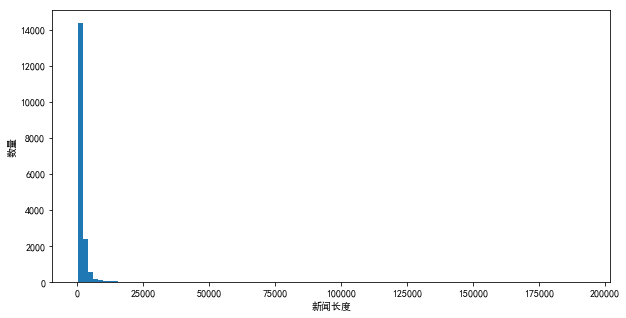

In [30]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
plt.figure(figsize=(10, 5))
plt.hist(all_text_len,100)    #前面是数据，后面是分的组数
plt.xlabel("新闻长度")
plt.ylabel("数量")
plt.show()

仅仅显示长度小于20000的新闻，使图更加清晰。

In [15]:
small_text_len = [i for i in all_text_len if i<20000]
print('长度大于20000的新闻条数为',len(all_text_len)-len(small_text_len))

长度大于20000的新闻条数为 85


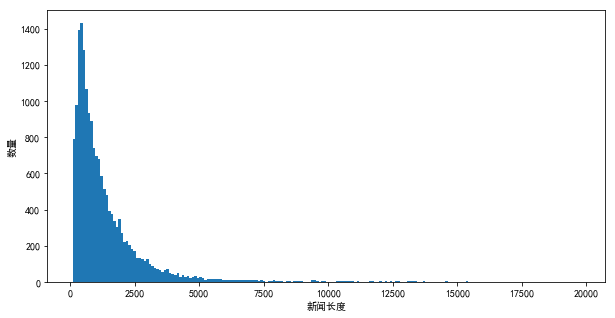

In [31]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
plt.figure(figsize=(10, 5))
plt.hist(small_text_len,200)    #前面是数据，后面是分的组数
plt.xlabel("新闻长度")
plt.ylabel("数量")
plt.show()

## 词频统计
* 分别展示常用词与非常用词（词频>200为常用词）
* 常用词去除了过于频繁的词，使展示更加清晰

In [19]:
txt_dir = './all_text_cut.txt'
with open(txt_dir, encoding = 'utf-8') as f:
    words = f.read().split(' ')

In [21]:
words = [word for word in words if word!='' and word!=' ' and word!='\n']

In [24]:
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] = word_freq[word] + 1
    else:
        word_freq[word] = 1

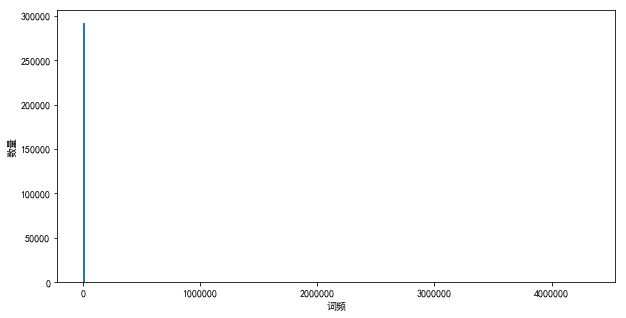

In [56]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
word_f = list(word_freq.values())
plt.figure(figsize=(10, 5))
plt.hist(word_f,200)    #前面是数据，后面是分的组数
plt.xlabel("词频")
plt.ylabel("数量")
plt.show()

In [63]:
print('不同词的数量为：', len(word_f))

不同词的数量为： 291504


In [64]:
word_common = []
word_rare = []
for i in word_f:
    if 30000>i>200:
        word_common.append(i)
    if i<=200:
        word_rare.append(i)
print('词频小于30000常用词数量：',len(word_common))
print('稀有词数量：',len(word_rare))
print('词频大于30000的常用词数量：', len(word_f)-len(word_common)-len(word_rare))

词频小于30000常用词数量： 5728
稀有词数量： 285742
词频大于30000的常用词数量： 34


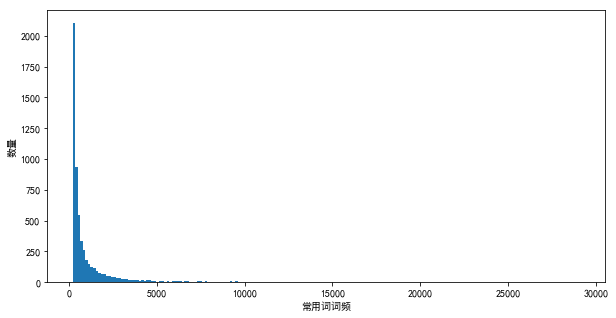

In [61]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
plt.figure(figsize=(10, 5))
plt.hist(word_common,200)    #前面是数据，后面是分的组数
plt.xlabel("常用词词频")
plt.ylabel("数量")
plt.show()

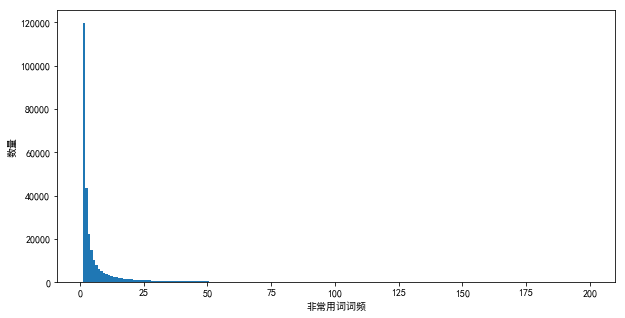

In [62]:
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
plt.figure(figsize=(10, 5))
plt.hist(word_rare,200)    #前面是数据，后面是分的组数
plt.xlabel("非常用词词频")
plt.ylabel("数量")
plt.show()